In [6]:
import numpy as nmp
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

N = 100

Модель $N(1, \theta)$

Оценка максимального пправдоподобия: $\widehat{\theta} = \overline{X}$

Байесовская оценка: (в качестве априорного распределения возьмем Bin(p, 1). Тогда сопряженное априорное - $N(a_0, \sigma_0^2)$)

$\widehat{\theta} = \frac{\frac{a_0}{\sigma_0^2} + \sum_{i = 0}^n X_i}{\frac{1}{\sigma_0^2} + n}$ 

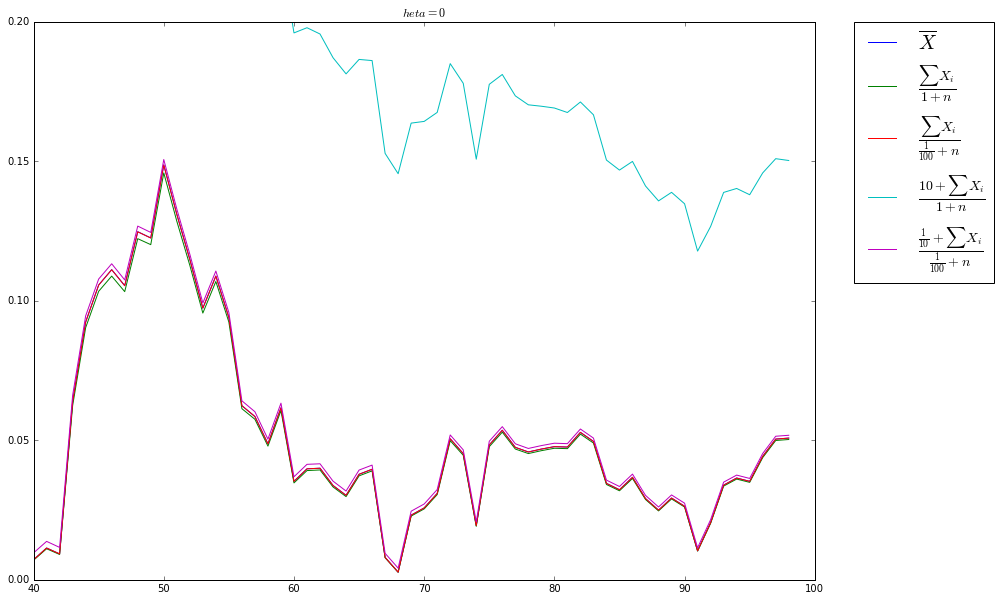

In [16]:
# сгенерируем выборку из распределения N(0, 1):
x_dist = sts.norm.rvs(loc=0, scale=1, size=N)

# построим график абссолютного отклонения оценки от истинного значения параметра
mle = [nmp.average(x_dist[:n]) for n in range (1, N)]
b_1 = [nmp.sum(x_dist[:n]) / (1 + n) for n in range (1, N)]
b_2 = [nmp.sum(x_dist[:n]) / (1 / 100 + n) for n in range (1, N)]
b_3 = [(10 + nmp.sum(x_dist[:n])) / (1 + n) for n in range (1, N)]
b_4 = [(1 / 10 + nmp.sum(x_dist[:n])) / (1 / 100 + n) for n in range (1, N)]

plt.figure(figsize=(14, 10))

plt.plot(abs(nmp.zeros(N - 1) - mle), label='$\\overline{X}$')
plt.plot(abs(nmp.zeros(N - 1) - b_1), label='$\\frac{\\sum{X_i}}{1 + n}$')
plt.plot(abs(nmp.zeros(N - 1) - b_2), label='$\\frac{\\sum{X_i}}{\\frac{1}{100} + n}$')
plt.plot(abs(nmp.zeros(N - 1) - b_3), label='$\\frac{10 + \\sum{X_i}}{1 + n}$')
plt.plot(abs(nmp.zeros(N - 1) - b_4), label='$\\frac{\\frac{1}{10} + \\sum{X_i}}{\\frac{1}{100} + n}$')
         
plt.axis([40, 100, 0, 0.2])
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, prop={'size':20}, borderaxespad = 0.)
plt.show()

И байесовская, и ОМП дают очень хорошее приближение. Лучшая оценка достигается при $N(0, 1)$

Модель $N(1, \theta)$

Оценка максимального правдоподобия: $\widehat{\theta} = \overline{X}$

Байесовская оценка: (в качестве априорного распределения возьмем Bin(1, p). Тогда сопряженное априорное распределение - $\Gamma^{-1}(\alpha_0, \beta_0)$)

$\widehat{\theta} = \frac{\beta_0 + \sum_{i = 0}^{n} X_i^2}{\alpha_0 + n/2 - 1}$

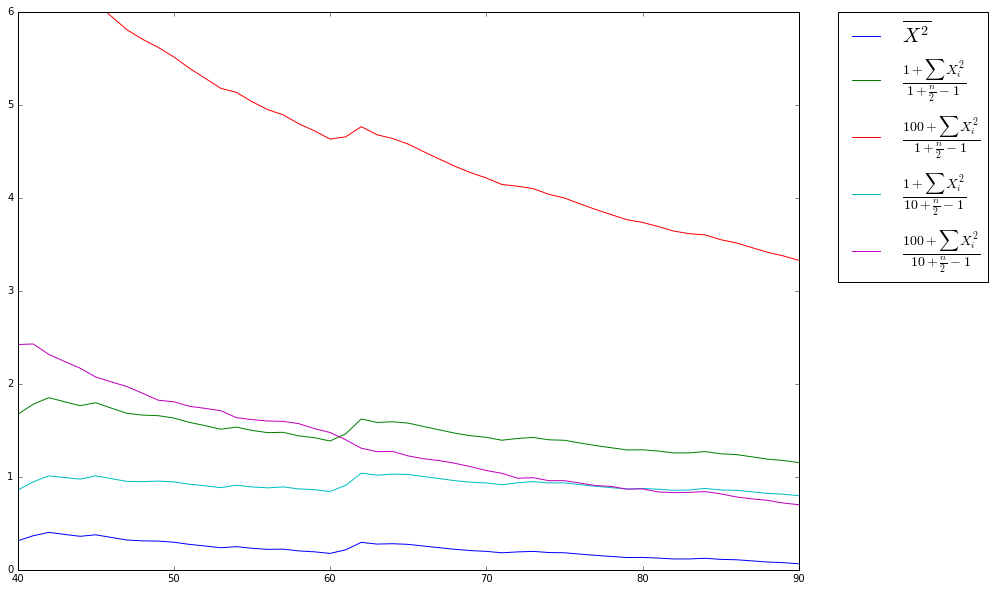

In [15]:
# построим график абсолютного отклонения от истинного значения параметра
mle = [nmp.average(x_dist[:n] ** 2) for n in range (1, N)]
b_1 = [(1 + nmp.sum(x_dist[:n] ** 2)) / (1 + n / 2 - 1) for n in range (1, N)]
b_2 = [(100 + nmp.sum(x_dist[:n] ** 2)) / (1 + n / 2 - 1) for n in range (1, N)]
b_3 = [(1 + nmp.sum(x_dist[:n] ** 2)) / (10 + n / 2 - 1) for n in range (1, N)]
b_4 = [(100 + nmp.sum(x_dist[:n])) / (10 + n / 2 - 1) for n in range (1, N)]

plt.figure(figsize=(14, 10))

plt.plot(abs(nmp.zeros(N - 1) + 1 - mle), label='$\\overline{X^2}$')
plt.plot(abs(nmp.zeros(N - 1) + 1 - b_1), label='$\\frac{1 + \\sum{X_i^2}}{1 + \\frac{n}{2} - 1}$')
plt.plot(abs(nmp.zeros(N - 1) + 1 - b_2), label='$\\frac{100 + \\sum{X_i^2}}{1 + \\frac{n}{2} - 1}$')
plt.plot(abs(nmp.zeros(N - 1) + 1 - b_3), label='$\\frac{1 + \\sum{X_i^2}}{10 + \\frac{n}{2} - 1}$')
plt.plot(abs(nmp.zeros(N - 1) + 1 - b_4), label='$\\frac{100 + \\sum{X_i^2}}{10 + \\frac{n}{2} - 1}$')

plt.axis([40, 90, 0, 6])
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, prop={'size':20}, borderaxespad = 0.)
plt.show()

Лучшая оценка - оценка максимального правдоподобия.